In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv(r'/Users/aaronreese/Desktop/Boat Data Project/Data/Prepared Data/boat_data_final.csv')

In [4]:
df.drop(['GBP Price','USD Price','Manufacturer','Condition','Fuel','Length (Meters)','Width (Meters)','Number of views last 7 days','Material','Country Sold In'], axis=1, inplace = True)

In [5]:
df.head()

,Year Built
0,2017.0
1,2020.0
2,NaN
3,2020.0
4,2019.0


In [6]:
df.shape

(9888, 1)

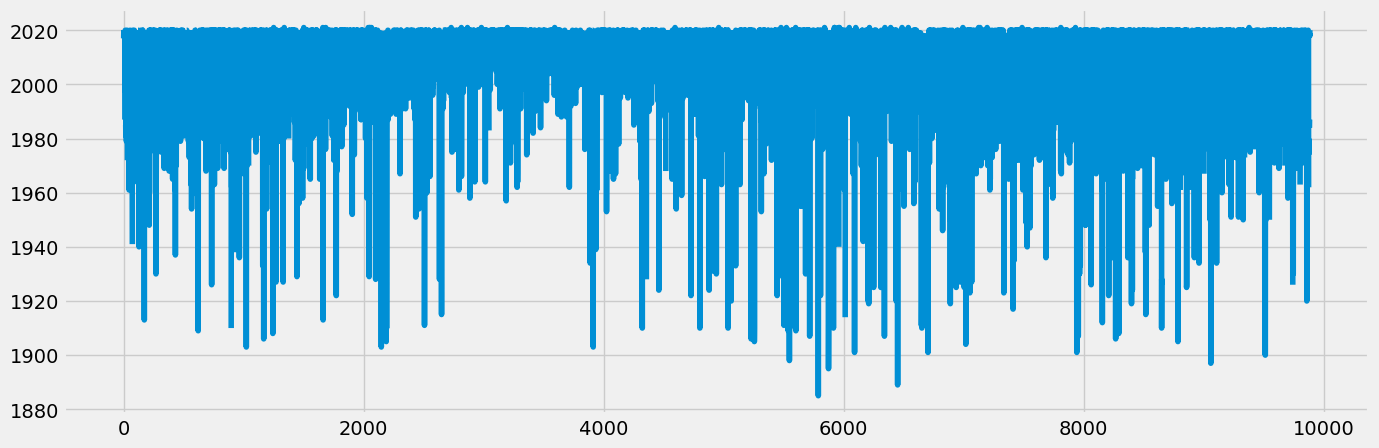

In [7]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

# Cleaning Time Series Data

In [8]:
df2 = df.reset_index()

In [9]:
df2.head()

,index,Year Built
0,0,2017.0
1,1,2020.0
2,2,NaN
3,3,2020.0
4,4,2019.0


In [10]:
df2.dtypes

index           int64
Year Built    float64
dtype: object

In [11]:
df2['Year Built'] = df2['Year Built'].astype(str) 

In [12]:
data_sub = df2.loc[(df2['Year Built'] >= '1988.0') & (df2['Year Built'] < '2020.0')]

In [13]:
data_sub.shape

(7052, 2)

In [14]:
data_sub.head()

,index,Year Built
0,0,2017.0
4,4,2019.0
6,6,1999.0
8,8,2019.0
9,9,2018.0


In [15]:
data_sub['Year Built'] = data_sub['Year Built'].astype(str).replace('\.0', '', regex=True)
print (data_sub)

      index Year Built
0         0       2017
4         4       2019
6         6       1999
8         8       2019
9         9       2018
...     ...        ...
9868   9868       1995
9873   9873       2019
9874   9874       2019
9886   9886       2018
9887   9887       2019

[7052 rows x 2 columns]


In [16]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Year Built']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Year Built'], axis=1, inplace=True) 
data_sub.head()

,index
datetime,
2017-01-01,0
2019-01-01,4
1999-01-01,6
2019-01-01,8
2018-01-01,9


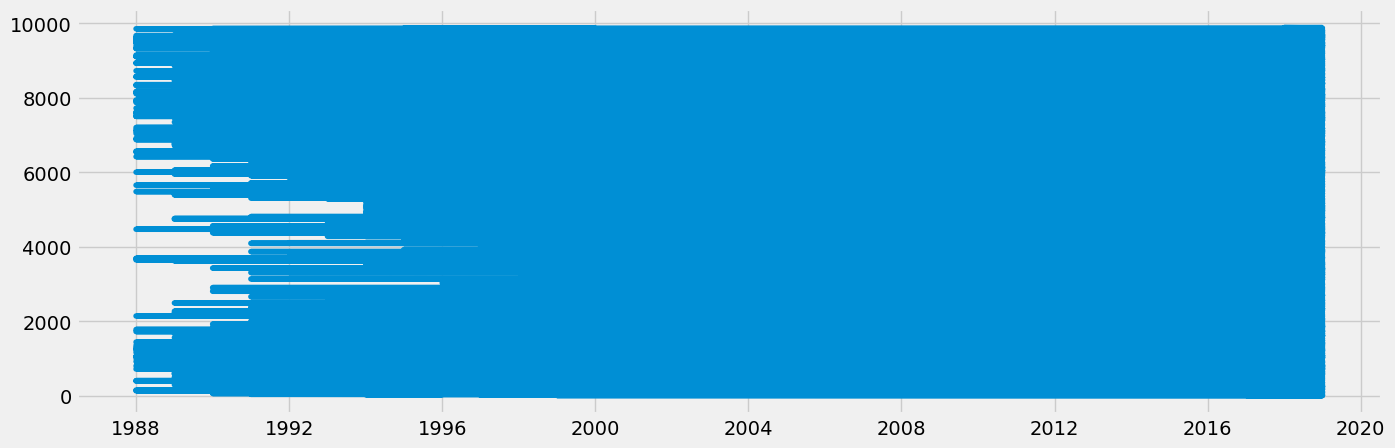

In [17]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [18]:
data_sub.isnull().sum() 

index    0
dtype: int64

In [19]:
dups = data_sub.duplicated()
dups.sum()

0

# Decomposition


In [20]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None